# Employee-Retention-Prediction

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

%matplotlib inline


In [2]:
#Reading the dataframe

df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#checking the shape of the data 

df.shape

(14999, 10)

In [4]:
#Checking Statistical Overview of Data

df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


###  **We can see that only columns departement and salary has unique values,So lets explore them**

In [5]:
# Checking Unique values of Department

df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
# Checking Unique values of Salary

df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

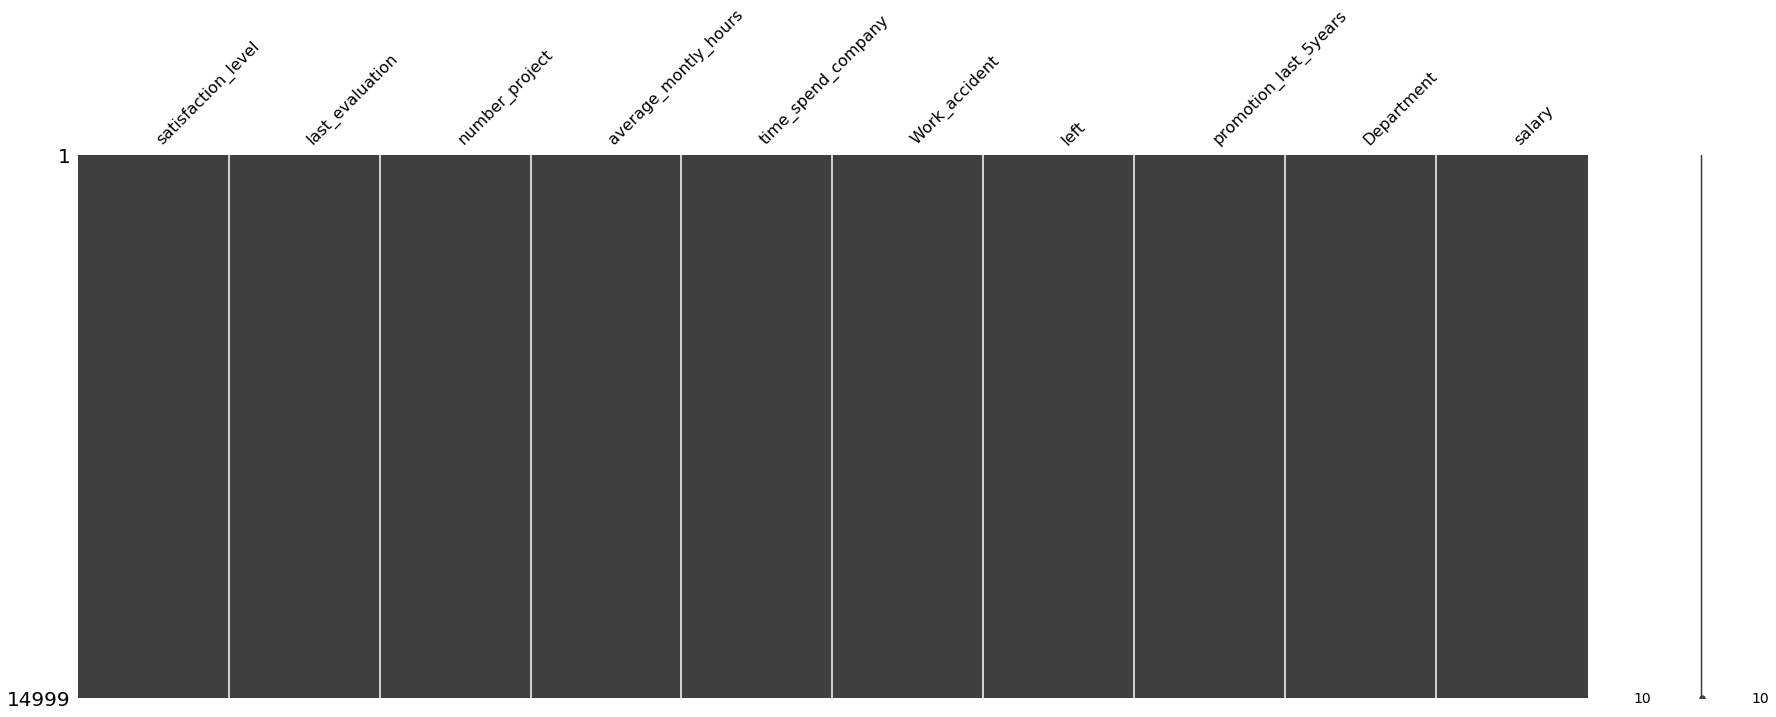

In [7]:
# Plot graphic of missing values

missingno.matrix(df, figsize = (30,10))
plt.show()

In [8]:
#Checking with isnull() function 

df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [9]:
#Counting Unique Values of Department.

df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
#Analysing Department Column

df.groupby('Department').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [11]:
#Getting Unique values of the Left column

df.groupby('left').count()['satisfaction_level']

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

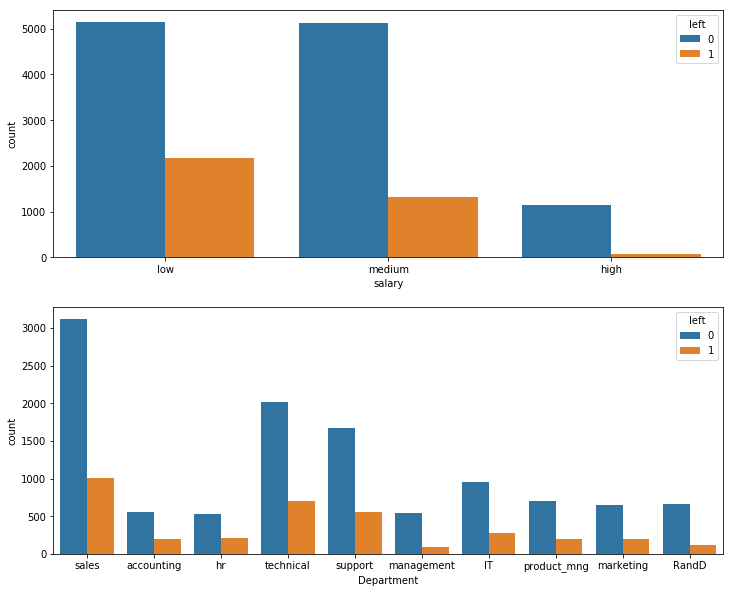

In [12]:
# Comparision of who left the company based on Salary and Department they are working in.

fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(12,10))
sns.countplot(x='salary',hue='left',data=df,ax=axis[0])
sns.countplot(x='Department',hue='left',data=df,ax=axis[1])
plt.show()

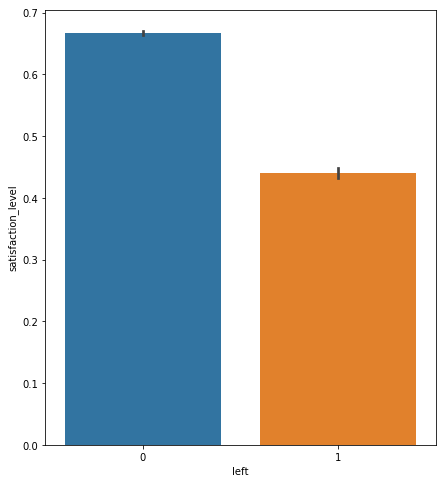

In [13]:
# Comparision of who left based on Satisfaction level

plt.figure(figsize=(7,8))
sns.barplot(x='left',y='satisfaction_level',data = df)
plt.show()

In [14]:
#Checking the correlation between the features

corr = df.corr(method='pearson')
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


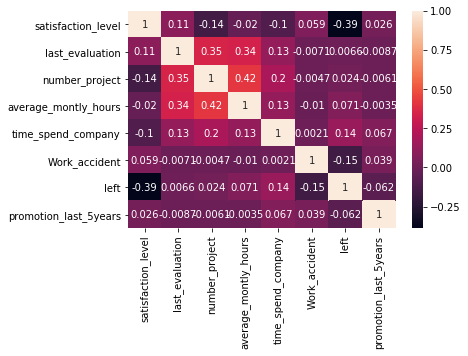

In [15]:
#Checking the correlation between the features using Heatmap

sns.heatmap(corr, annot=True)
plt.show()

In [16]:
#CONVERTING CATEGORICAL FEATURES TO NUMERICAL ONE

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

sal_num=le.fit_transform(df['Department'])
dept = le.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
df['salary_num'] = sal_num
df['dept'] = dept
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num,dept
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


In [18]:
df.drop(['Department','salary'],axis=1,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,dept
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# MODEL SELECTION


In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,dept
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [20]:
y=df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [21]:
X=df.drop(['left'],axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num,dept
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [22]:
#Importing Essential Machine Learning Algorithms to test the efficiency

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 


X_train, X_test, y_train, y_test = train_test_split(
     X.as_matrix(), y.as_matrix(), test_size=0.3, random_state=42)




In [23]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [24]:
# Checking the shape of Train and Test dataset 

print("The X training set shape = ",X_train.shape)
print("The X testing set shape = ",X_test.shape)

The X training set shape =  (10499, 9)
The X testing set shape =  (4500, 9)


In [25]:
# K Nearest Neighbors(KNN)

knn = KNeighborsClassifier()
knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
#Accuracy of KNN

(knn.score(X_test,y_test)*100)

94.17777777777778

In [27]:
cross_val_score(KNeighborsClassifier(), X, y.values.ravel(),cv=3).mean()*100

92.51270770050832

In [28]:
#Support Vector Machine(SVM)

sv = SVC()
sv.fit(X_test,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
#Accuracy of SVM

sv.score(X_test,y_test)*100

95.86666666666666

In [30]:
cross_val_score(SVC(gamma='auto'), X, y.values.ravel(),cv=3).mean()*100

94.51292378051696

In [31]:
# Decision Tree Classifier

dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_test,y_test)
y_pred=dt.predict(X_test)

In [32]:
#Accuracy of Decision Tree Classifier

dt.score(X_test,y_test)*100

96.66666666666667

In [33]:
cross_val_score(DecisionTreeClassifier(max_depth=4),X,y,cv=3).mean()*100

96.43304119065498

## SCORES OF THE ALGORITHMS 

| ALGORITHM      | SCORE 
| :---        |    :----:   
| KNN     |      92.17 %
| SVM |          94.51 %
| DECISION TREE |96.49 %

## 🌲🌳 **DECISION TREE** PERFORMS WELL ON THIS EMPLOYEE RETENTION DATASET 🌲🌳

# Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3376,   52],
       [  98,  974]], dtype=int64)

In [35]:
# TP = 3376
# TN = 974
# FP = 52 (also known as Type 1 Error) 
# FN = 98 (also know as Type 2 Error)

In [36]:
#Accuracy = No. of correct predictions / Total predictions.

# (TP+TN)/(TP+TN+FP+FN)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [37]:
# Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.98483081, 0.90858209])

In [38]:
# Precision = TP/(TP+FP)
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.97179044, 0.94931774])

In [39]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.97826717, 0.92850334])